# 5.1 Use a Tagger

    A part-of-speech tagger, or POS tagger, processes a sequence of words, and attaches a part of speech tag to each word.

In [1]:
import nltk

In [3]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [5]:
# words contain homonyms

text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

Lexical categories like “noun” and part-of-speech tags like NN seem to have their uses, but the details will be obscure to many readers.

You might wonder what justification there is for introducing this extra level of information. Many of these categories arise from superficial analysis of the distribution of words in text.

In [6]:
# text.similar(w) --> w1-w-w2 --> w' where w1-w'-w2

text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [7]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [8]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [9]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


    Observe that searching for woman finds nouns; searching for bought mostly finds verbs; searching for over generally finds prepositions; searching for the finds several determiners.

# 5.2 Tagged Corpus

### Representing Tagged Tokens

In [11]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [12]:
sent = '''
    The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
    other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
    Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
    said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
    accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
    interest/NN of/IN both/ABX governments/NNS ''/'' ./.
    '''

[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

### Reading Tagged Corpora

In [13]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [29]:
# with a simplified version of tagger

nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

### A Simplified Part-of-Speech Tagset

    Tag -- Meaning -- Examples
    
    ADJ -- adjective -- new, good, high, special, big, local
    ADV -- adverb -- really, already, still, early, now
    CNJ -- conjunction -- and, or, but, if, while, although
    DET -- determiner -- the, a, some, most, every, no
    EX -- existential -- there, there's
    FW -- foreign word -- dolce, ersatz, esprit, quo, maitre
    MOD -- modal verb -- will, can, would, may, must, should
    N -- noun -- year, home, costs, time, education
    NP -- proper noun -- Alison, Africa, April, Washington
    NUM -- number -- twenty-four, fourth, 1991, 14:21
    PRO -- pronoun -- he, their, her, its, my, I , us
    P -- preposition -- on, of, at, with, by, into, under
    TO -- the word to -- to
    UH -- interjection -- ah, bang, ha, whee, hmpf, oops
    V -- verb --is, has, get, do, make, see, run
    VD -- past tense -- said, took, told, made, asked
    VG -- presemt participle -- making, going, playing, working
    VN -- past participle -- given, taken, begun, sung
    WH -- why determiner -- who, which, when, what, where, how

In [32]:
# check the type of pos tags in genere 'news' of brown corpras

from nltk.corpus import brown

brown_news_tagged = brown.tagged_words(
    categories='news', tagset='universal'
)

tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

dict_keys(['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X'])

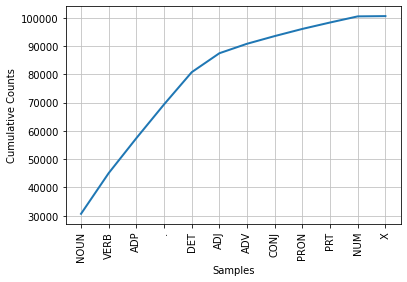

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [34]:
tag_fd.plot(cumulative=True)

### Nouns

    Nouns generally refer to people, places, things, or concepts, e.g., woman, Scotland, book, intelligence

### Verbs

    Verbs are words that describe events and actions.
    
### Adjectives and Adverbs

    Adjectives describe nouns, and can be used as modifiers (e.g., large in the large pizza), or as predicates (e.g., the pizza is large).
    
    Adverbs modify verbs to specify the time, manner, place, or direction of the event described by the verb (e.g., quickly in the stocks fell quickly). Adverbs may also modify adjectives (e.g., really in Mary’s teacher was really nice).

# 5.3 Mapping Words to Properties Using Python Dictionaries

### Dictionaries in Python

In [35]:
# usually the lexical pos tag is stored in the form of dictionary

pos = {}
pos['colorless'] = 'ADJ'
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [36]:
# get the keys for the dictionary

list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [37]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [38]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

In [39]:
# sorted function with tuple first use the first elements 
# and if same, move to next

for key, val in sorted(pos.items()):
    print(f'{key} : {val}')

colorless : ADJ
furiously : ADV
ideas : N
sleep : V


# 5.4 Automatic Tagging

### The Default Tagger

In [40]:
# the most simple one assign the same tag to everything

tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [41]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

### The Regular Expression Tagger

In [44]:
# regular expression tagger based on matching patterns

patterns = [
    (r'.*ing$', 'VBG'), # gerunds
    (r'.*ed$', 'VBD'), # simple past
    (r'.*es$', 'VBZ'), # 3rd singular present
    (r'.*ould$', 'MD'), # modals
    (r'.*\'s$', 'NN$'), # possessive nouns
    (r'.*s$', 'NNS'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN') # nouns (default)
]


In [45]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NNS'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

### The Lookup Tagger

In [52]:
# store the most frequent word in the corpus

fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = list(fd.keys())[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(
    model=likely_tags)
baseline_tagger.tag(tokens)

[('I', None),
 ('do', None),
 ('not', None),
 ('like', None),
 ('green', None),
 ('eggs', None),
 ('and', 'CC'),
 ('ham', None),
 (',', ','),
 ('I', None),
 ('do', None),
 ('not', None),
 ('like', None),
 ('them', None),
 ('Sam', None),
 ('I', None),
 ('am', None),
 ('!', None)]

In [53]:
# refers to not find, but we wish to use the LUT first then
# if not use the default tagger -- called 'backoff'

fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = list(fd.keys())[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(
    model=likely_tags, backoff=nltk.DefaultTagger('NN'))
baseline_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'CC'),
 ('ham', 'NN'),
 (',', ','),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

### Evaluation

    evaluate against human expert and gold standard test data

# 5.5 N-Gram Tagging

### Unigram Tagging

    for each token, assign the tag that is most likely for that particular token.

In [54]:
from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [55]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [56]:
# split training and testing

size = int(len(brown_tagged_sents) * 0.9)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

### General N-Gram Tagging

    An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding tokens

In [57]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [58]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [59]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

### Combining Taggers

    1. Try tagging the token with bigram tagger
    2. If no tag, then unigram
    3. If no tag, then default tagger

In [60]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

t2.evaluate(test_sents)

0.8452108043456593

# 5.6 Transformation-Based Tagging

    check Brill tagging and potentially reinforcement learning

# 5.7 How to Determine the Category of a Word

    Morphological Clues
    
    Syntactic Clues
    
    Semantic Clues
    
    New Words